In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

## Normal distribution with three-sigma rule

This is the data from my exploratory analysis of [Big Five Personality Test's](https://en.wikipedia.org/wiki/Big_Five_personality_traits) answers. You can find it [here](https://github.com/GevHovh/my_resume/blob/master/Big%20Five%20Personality%20Test,%20Exploratory%20analysis.ipynb).

In [3]:
antworten = pd.read_csv(r'C:\Users\Gev\Desktop\Data science\Big Five\antworten.csv', index_col = 0)

In [4]:
antworten.head()

,extraversion,neuroticism,agreeableness,conscientiousness,openness
0,9.1,4.2,7.5,6.0,8.9
1,3.2,4.4,8.6,7.1,6.6
2,4.4,4.6,8.2,6.4,8.0
3,4.6,5.3,7.3,4.4,7.5
4,5.3,3.0,9.1,9.6,9.6


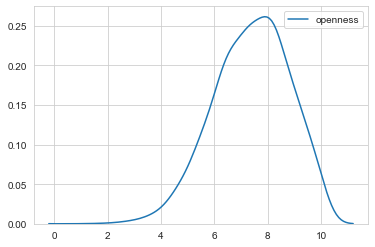

In [5]:
opn = antworten.openness
x,y = sns.kdeplot(opn, bw = 0.4).lines[0].get_data()

def find_nearest(array, value):
    """
    Finds nearest(to parametr value) value in given array
    """
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def find_y(x_value, x_line = x, y_line = y):
    """
    Finds value in y array with the same index as the value from x array
    """
    value = find_nearest(x_line, x_value)
    index = np.where(x_line==value)
    return y[index][0]

In [6]:
def y_from_x(x, x_line = x, y_line = y):
    """
    Similar to find_y, except that this function is for array
    """
    new_list = np.array([])
    for i in x:
        index = np.where(x_line==i)
        new_list = np.append(new_list, y_line[index])
    
    return new_list

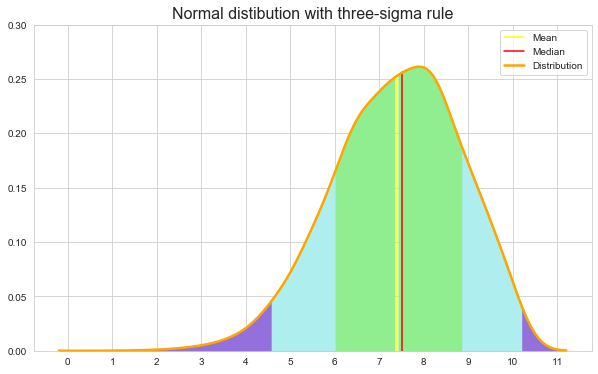

In [7]:
plt.figure(figsize = (10,6))
plt.title('Normal distibution with three-sigma rule', fontsize = 16)
plt.xticks(list(range(0,12)))
plt.ylim((0,0.3))

# Sigma
mean = np.mean(opn)
sigma = opn.describe()['std']

sigma_values = [0,1,2]
colors = ['lightgreen','paleturquoise', 'mediumpurple']

# Left side
for i in range(3):
    left_sigma = mean - sigma_values[i] * sigma # Calculate left sigma value(x axis)
    left_y = find_y(left_sigma) # Calculate left sigma value(y axis)
    left_y = left_y / 0.3 # As there was some problem with precision I have to limit y axis to max 0.3
    
    # Fill surface
    left_x_bound = x[x < left_sigma]
    left_y_bound = y_from_x(left_x_bound)
    plt.fill_between(left_x_bound, left_y_bound, color = colors[i])
    
# Right side
for i in range(3):
    right_sigma = mean + sigma_values[i] * sigma
    right_y = find_y(right_sigma)
    right_y = right_y / 0.3
    
    # Fill surface
    right_x_bound = x[x > right_sigma]
    right_y_bound = y_from_x(right_x_bound)
    plt.fill_between(right_x_bound, right_y_bound, color = colors[i])

# Mean line plot
mean_y = find_y(mean)
mean_y = mean_y / 0.3
plt.axvline(x = mean, ymax = mean_y, color = 'yellow', label = 'Mean', linewidth = 1.5)

# Median line plot
median = opn.describe()['50%']
median_y = find_y(median)
median_y = median_y / 0.3
plt.axvline(x = median, ymax = median_y, color = 'red', label = 'Median', linewidth = 1.5)

# KDE plot
kde = sns.kdeplot(opn, bw = 0.4, color = 'orange', legend = False, linewidth = 2.5, label = 'Distribution')

plt.legend()
plt.show()

## Confidence interval of regression coefficients

In [8]:
import statsmodels.api as sm

In [9]:
x = pd.read_csv(r'C:\Users\Gev\Desktop\Data science\house-prices-advanced-regression-techniques\x.csv', index_col = 0)

In [10]:
y = pd.read_csv(r'C:\Users\Gev\Desktop\Data science\house-prices-advanced-regression-techniques\y.csv', index_col = 0)

In [11]:
results = sm.OLS(y,x).fit() # Linear Regression with OLS metod

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              6380.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):                        0.00
Time:                        18:00:24   Log-Likelihood:                         -17211.
No. Observations:                1417   AIC:                                  3.443e+04
Df Residuals:                    1413   BIC:                                  3.445e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
MasVnrArea     76.1880      7.907      9.636      0.000      60.678      91.698
TotalBsmtSF    63.9348      3.163     20.214      0.000      57.730      70.139
GrLivArea      66.9470      2.269     29.501      0.000      62.496      71.399
WoodDeckSF     64.8351     10.353      6.262      0.000      44.525      85.145
==============================================================================
Omnibus:                      301.886   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4156.034
Skew:                           0.582   Prob(JB):                         0.00
Kurtosis:                      11.309   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
coef_table = pd.read_html(results.summary().tables[1].as_html(),header=0, index_col=0)[0] # Coefficent table from summary

In [14]:
coef_table 

,coef,std err,t,P>|t|,[0.025,0.975]
MasVnrArea,76.1880,7.907,9.636,0.0,60.678,91.698
TotalBsmtSF,63.9348,3.163,20.214,0.0,57.730,70.139
GrLivArea,66.9470,2.269,29.501,0.0,62.496,71.399
WoodDeckSF,64.8351,10.353,6.262,0.0,44.525,85.145


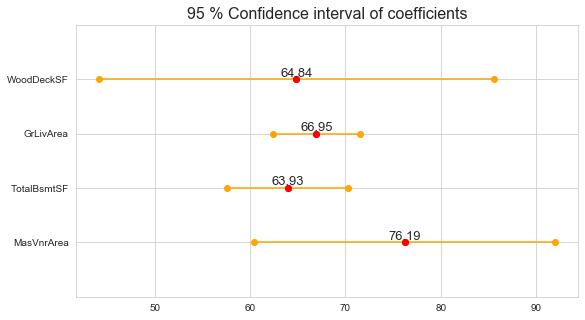

In [15]:
plt.figure(figsize = (9,5))
plt.title('95 % Confidence interval of coefficients', fontsize = 16)

for col in x.columns:
    coef = round(coef_table.loc[col,'coef'], 2) # Extracting coefficient
    std_err = coef_table.loc[col,'std err'] # Extracting standart error of coefficient
    plt.plot((coef - 2*std_err, coef + 2*std_err), (col,col), 'ro-', color = 'orange') # Interval line
    plt.plot((coef, coef), (col,col), 'bo', color = 'red') # Coeficent dot
    plt.text(x = coef, y = col, s = coef, va = 'bottom', ha = 'center', fontsize = 13) # Coeficent value

plt.ylim((-1, 4))
plt.show()

## Log function effect on skewed normal distribution

In [16]:
log_gr = np.log(x['GrLivArea'])
log_total = np.log(x['TotalBsmtSF'])

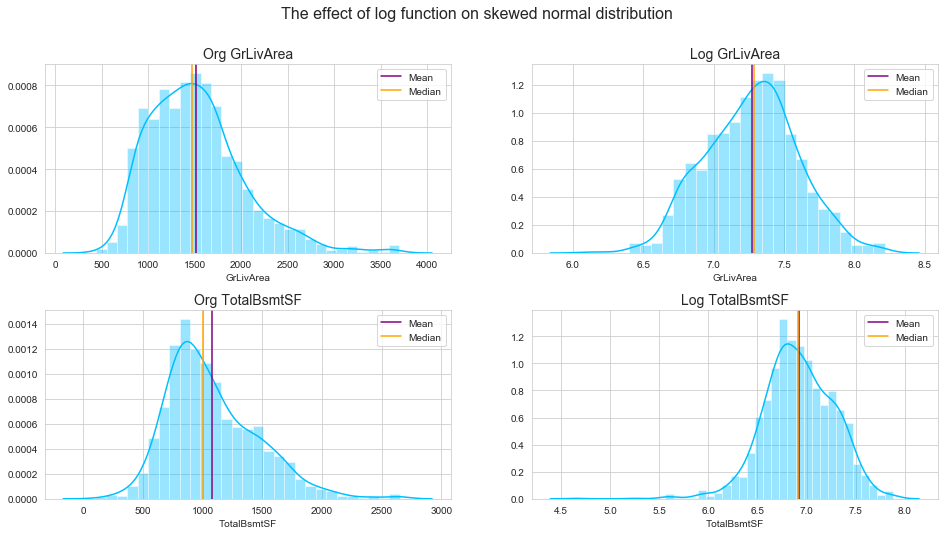

In [17]:
fig, ax = plt.subplots(2,2, figsize = (16,8))
plt.suptitle('The effect of log function on skewed normal distribution', fontsize = 16)
plt.subplots_adjust(hspace = 0.3)
ax = ax.ravel()

data_list = [x['GrLivArea'], log_gr, x['TotalBsmtSF'], log_total]
titles = ['Org GrLivArea', 'Log GrLivArea', 'Org TotalBsmtSF', 'Log TotalBsmtSF']

for i in range(4):
    ax[i] = sns.distplot(data_list[i], color = 'deepskyblue', ax=ax[i], kde_kws = {'linewidth': 1.5}) # Drawing hisogram and KDE
    ax[i].set_title(titles[i], fontsize = 14)
    ax[i].axvline(x = np.mean(data_list[i]), color = 'purple',  linewidth = 1.5, label = 'Mean') # Drawing vertical line of mean
    ax[i].axvline(x = np.median(data_list[i]), color = 'orange', linewidth = 1.5, label = 'Median') # Vertical line of median
    ax[i].legend()

plt.show()

### Difference between mean and median

From the figure above we can notice, that log function has more significant effect on TotalBsmtSF. So, below, I'll consider only this data.

#### Org data

In [18]:
bsmt_mean = np.round(np.mean(x['TotalBsmtSF']), 2)
bsmt_med = np.round(np.median(x['TotalBsmtSF']), 2)
dif = np.round(bsmt_mean - bsmt_med, 2)

print('# TotalBsmtSF Data\n')
print('Mean: {}'.format(bsmt_mean))
print('Median: {}'.format(bsmt_med))
print('Difference is {}, which is {}% of the mean.'.format(dif, np.round(dif / bsmt_mean * 100, 2)))

# TotalBsmtSF Data

Mean: 1078.36
Median: 1004.0
Difference is 74.36, which is 6.9% of the mean.


#### Log data

In [19]:
log_bsmt_mean = np.round(np.mean(log_total), 2)
log_bsmt_med = np.round(np.median(log_total), 2)
log_dif = np.round(log_bsmt_mean - log_bsmt_med, 2)

print('# TotalBsmtSF Log Data\n')
print('Mean: {}'.format(log_bsmt_mean))
print('Median: {}'.format(log_bsmt_med))
print('Difference is {}, which is {}% of the mean.'.format(log_dif, np.round(log_dif / log_bsmt_mean * 100, 2)))

# TotalBsmtSF Log Data

Mean: 6.92
Median: 6.91
Difference is 0.01, which is 0.14% of the mean.


#####  We can see from here, that the difference between mean and median, which describes the skewness of distribution, decreased significantly.